# The Logging Module

Logging is a very useful tool in a programmer’s toolbox. 

It can help you develop a better understanding of the flow of a program and discover scenarios that you might not even have thought of while developing. 



In [1]:
import logging

With the logging module imported, you can use something called a “logger” to log messages that you want to see.

In [2]:
logging.debug('This is a debug message')
logging.info('This is an info message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


The output shows the severity level before each message along with root, which is the name the logging module gives to its default logger 

## Basic Configurations

Some of the commonly used parameters for basicConfig() are the following:

- level: The root logger will be set to the specified severity level.
- filename: This specifies the file.
- filemode: If filename is given, the file is opened in this mode. The default is a, which means append.
- format: This is the format of the log message.

In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
logging.debug('This will get logged')

DEBUG:root:This will get logged


For logging to a file rather than the console, filename and filemode can be used, and you can decide the format of the message using format. The following example shows the usage of all three:

In [1]:
import logging
logging.basicConfig(filename='app.log', filemode='w', format='%(name)s - %(levelname)s - %(message)s')
logging.warning('This will get logged to a file')

## Formatting the Output

Format can take a string with LogRecord attributes in any arrangement you like. The entire list of available attributes can be found [here](URL 'https://docs.python.org/3/library/logging.html#logrecord-attributes')

In [1]:
import logging

logging.basicConfig(format='%(process)d-%(levelname)s-%(message)s')
logging.warning('This is a Warning')

In [1]:
import logging

logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)
logging.info('Admin logged in')

In [2]:
import logging

logging.basicConfig(format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')
logging.warning('Admin logged out')

## Logging Variable Data

In [ ]:
import logging

name = 'John'

logging.error('%s raised an error', name)
#logging.error(f'{name} raised an error')

## Capturing Stack Traces

The logging module also allows you to capture the full stack traces in an application. Exception information can be captured if the exc_info parameter is passed as True

In [ ]:
import logging

a = 5
b = 0

try:
    c = a / b
except Exception as e:
    #logging.error("Exception occurred", exc_info=True)
    logging.exception("Exception occurred")

## Classes and Functions

The most commonly used classes defined in the logging module are the following:

- **Logger**: This is the class whose objects will be used in the application code directly to call the functions.

- **LogRecord**: Loggers automatically create LogRecord objects that have all the information related to the event being logged, like the name of the logger, the function, the line number, the message, and more.

- **Handler**: Handlers send the LogRecord to the required output destination, like the console or a file. Handler is a base for subclasses like StreamHandler, FileHandler, SMTPHandler, HTTPHandler, and more. These subclasses send the logging outputs to corresponding destinations, like sys.stdout or a disk file.

- **Formatter**: This is where you specify the format of the output by specifying a string format that lists out the attributes that the output should contain.

In [ ]:
import logging

logger = logging.getLogger('example_logger')
logger.warning('This is a warning')

Unlike the root logger, a custom logger can’t be configured using basicConfig(). You have to configure it using Handlers and Formatters:

## Using Handlers

Handlers send the log messages to configured destinations like the standard output stream or a file or over HTTP or to your email via SMTP.

Like loggers, you can also set the severity level in handlers. This is useful if you want to set multiple handlers for the same logger but want different severity levels for each of them.

In [ ]:
# logging_example.py

import logging

# Create a custom logger
logger = logging.getLogger(__name__)

# Create handlers
c_handler = logging.StreamHandler()
f_handler = logging.FileHandler('file.log')
c_handler.setLevel(logging.WARNING)
f_handler.setLevel(logging.ERROR)

# Create formatters and add it to handlers
c_format = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
f_format = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
c_handler.setFormatter(c_format)
f_handler.setFormatter(f_format)

# Add handlers to the logger
logger.addHandler(c_handler)
logger.addHandler(f_handler)

logger.warning('This is a warning')
logger.error('This is an error')

The name of the logger corresponding to the __name__ variable is logged as __main__, which is the name Python assigns to the module where execution starts. 

## Loading from Yaml file


In [ ]:
import logging
import logging.config
import yaml

with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f.read())
    logging.config.dictConfig(config)

logger = logging.getLogger(__name__)

logger.debug('This is a debug message')

# Data Version Contol (DVC)

## What ?

Data Version Control, or DVC, is a data and ML experiment management tool that takes advantage of the existing engineering toolset like Git.


## Why ?

- Build automated pipelines & reproducible experiments
- Manage data and model versioning
- Organize project code and team collaboration
- Visualize metrics & collaborate on ML experiments.

## How ?

### **Step 1**: Organize repo & Build a prototype
### **Step 2**: Create a single configuration file




In [ ]:
import yaml
%cd /workspace/boneage-arc/

In [ ]:
with open("params.yaml") as conf_file:
    config = yaml.safe_load(conf_file)
print(config)

### **Step 3**: Move reusable code to .py modules


In [ ]:
from src.stages.data_load import *
from src.utils.logs import get_logger


### **Step 4**: Build ML experiment pipeline

In [ ]:
data_load(config_path = 'params.yaml')
#!python -m src.stages.data_load --config=params.yaml

### **Step 5**: Automate pipeline with DVC

Install DVC

`!pip install dvc`

Initialize DVC

`!dvc init`


Commit Changes

`
 git status
 git add .
 git commit -m "Initialize dvc"
`

Run stages

Data load
`
dvc run --force -n data_load \
-d src/stages/data_load.py \
-o data/processed/processed.csv \
-o data/processed/train_processed.csv \
-o data/processed/test_processed.csv \
-o data/processed/rsna_processed.csv \
-p  base,data_load \
python -m src.stages.data_load --config=params.yaml`

Data split
`
dvc run --force -n data_split \
-d src/stages/data_split.py \
-d data/processed/train_processed.csv \
-o data/processed/train_processed1.csv \
-o data/processed/val_processed.csv \
-p  base,data_split \
python -m src.stages.data_split --config=params.yaml`


Featurize
`
dvc run --force -n featurize \
-d src/stages/featurize.py \
-d data/processed/processed.csv \
-o data/processed/featurized.csv \
-o data/processed/norm_params.json \
-p  base,featurize \
python -m src.stages.featurize --config=params.yaml`

Train

`
dvc run --force -n train_monai \
-d src/stages/train_monai.py \
-d data/processed/train_processed1.csv \
-d data/processed/val_processed.csv \
-o output/models/pipeline_models/Monai_Resnet_1.pth \
-p  base,train \
python -m src.stages.train_monai --config=params.yaml
`

Evaluate

`
dvc run --force -n evaluate \
-d src/stages/evaluate.py \
-d data/processed/test_processed.csv \
-d data/processed/rsna_processed.csv \
-d output/models/pipeline_models/Monai_Resnet_1.pth \
-o reports/metrics.json \
-p  base,evaluate \
python -m src.stages.evaluate --config=params.yaml
`

### **Step 6**: Reproduce end-to-end pipeline


`dvc repro`

`dvc repro -f`

`dvc repro -s featurize`


Update .py file and run `dvc repro`

delete an output file and run `dvc repro`

change hyperparams in params.yaml aand run `dvc repro`


## Data Management

- Reproducible ML experiments requires versionbed data, models and expiriment artifacts.
- Meet regulatory compliance and Ethical AI requirements
- Avoid manual versioning




### [Getting Started](https://dvc.org/doc/start/data-management)

To start tracking a file or directory, use `dvc add`

create a file.txt and track with `dvc add` 

create a dir and track with `dvc add -v`

DVC stores information about the added file in a special .dvc file named `file.txt.dvc` — a small text file with a human-readable format. This metadata file is a placeholder for the original data, and can be easily versioned like source code with Git:

`git add file.txt.dvc`

`git commit -m "add raww data"`


```
Removing '/workspace/boneage-arc/file.txt'
Uploading '/workspace/boneage-arc/.dvc/cache/d4/1d8cd98f00b204e9800998ecf8427e' to '/workspace/boneage-arc/file.txt'
Saving information to 'file.txt.dvc'.
```

### Storing and sharing

You can upload DVC-tracked data or model files with dvc push, so they're safely stored remotely. This also means they can be retrieved on other environments later with dvc pull. First, we need to set up a remote storage location:

`dvc remote add -d myremote /workspace/temp`

`git add .dvc/config`

`git commit -m "Configure remote storage"`

open config file

`dvc push -v`

### Retrieving

Having DVC-tracked data and models stored remotely, it can be downloaded when needed in other copies of this project with dvc pull

dvc uploads dependencies and outputs in `dvc.lock` to remote storage

`dvc pull`

you can delete the cache (.dvc/cache) and data/data.xml to experiment with dvc pull:

`rm -rf .dvc/cache`

`rm -f data/data.xml`

`dvc pull`


### Making changes

When you make a change to a file or directory, run dvc add again to track the latest version:


make some change

`dvc add file.txt`

`git commit `

`dvc push` 

### Switching between versions



The regular workflow is to use git checkout first (to switch a branch or checkout a .dvc file version) and then run dvc checkout to sync data:

`git checkout <...>`

`dvc checkout`

go back to the original version of the data:

`git checkout HEAD~1 file.txt.dvc`

`dvc checkout`

`git commit file.txt.dvc -m "Revert dataset updates"`



- update data

- track with dvc

- commit .dvc

- `git tag -a "v1.0" -m "file with some data"`

- push to remote

- git log --oneline

- git checkout HEAD^1 file.txt.dvc

- dvc checkout

- commit changes

### Data Pipelines

dvc stage add -n prepare \
                -p prepare.seed,prepare.split \
                -d src/prepare.py -d data/data.xml \
                -o data/prepared \
                python src/prepare.py data/data.xml

DVC uses these metafiles to track the data used and produced by the stage, so there's no need to use `dvc add` manually.

Once you added a stage, you can run the pipeline with dvc repro. Next, you can use dvc push if you wish to save all the data to remote storage (usually along with git commit to version DVC metafiles).


### Dependency graphs (DAGs)

`dvc status` command can be used to compare this state with an actual state of the workspace.

change params.yaml stage and check diff

Visualize the prepare, featurize, train, and evaluate stages of a pipeline as defined in dvc.yaml:

`dvc dag`

The pipeline can also be seen from the point of view of how stage outputs/dependencies are connected

`dvc dag --outs`

### Metrics, Parameters, and Plots

`
dvc run -n evaluate \
          -d src/evaluate.py -d model.pkl -d data/features \
          -M evaluation.json \
          --plots-no-cache evaluation/plots/precision_recall.json \
          --plots-no-cache evaluation/plots/roc.json \
          --plots-no-cache evaluation/plots/confusion_matrix.json \
          --plots evaluation/importance.png \
          python src/evaluate.py model.pkl data/features`
          
With cache: false, DVC skips caching the output, as we want evaluation.json, precision_recall.json, confusion_matrix.json, and roc.json to be versioned by Git.

you can view tracked metrics and plots with DVC.
`dvc metrics show`

#### Defining stage parameters

make changes to param.yaml file

`dvc repro`

`dvc params diff `

`dvc metrics diff `

`dvc plots diff `




## [Experiments](https://dvc.org/doc/start/experiments)




If you already have a DVC project, that's great. You can start to use `dvc exp` commands right away to run experiments in your project.

Otherwise:
` dvc exp init --interactive`


Running the experiment with the default project settings requires only the command:

`dvc exp run`

This runs the command specified in `dvc.yaml` (`python train.py`), and creates models, plots, and metrics in the respective directories. The experiment is then associated with the values found in the parameters file (`params.yaml`) and other dependencies, as well as the metrics produced.

You can review the experiment results with `dvc exp show` and see these metrics and results in a nicely formatted table




### Running Experiments



Option `dvc exp run --set-param` allows to update experimental parameters without modifying the files manually

`dvc exp run --set-param train.estimators.Monai_Resnet.lr=0.003`

`dvc exp run -S train.estimators.Monai_Resnet.lr=0.003 -S train.estimators.Monai_Resnet.step_size=0.001  `


Instead of running the experiments one-by-one, we can define them to run in a batch. This is especially handy when you have long running experiments.

`dvc exp run --queue -S train.estimators.Monai_Resnet.lr=0.004`

`dvc exp run --queue -S train.estimators.Monai_Resnet.lr=0.005`

`dvc exp run --queue -S train.estimators.Monai_Resnet.lr=0.009`

run all queued experiments in parallel. You can specify the number of parallel processes using --jobs:

`dvc exp run --run-all --jobs 2`

After selecting an experiment from the table, you can create a Git branch that contains the experiment with all its related files.

`dvc exp branch exp-d3aae "cnn-256"`

You can then checkout and continue working from this branch, or merge the branch into your main branch with the usual Git commands.

`dvc exp diff`

Use `dvc exp apply` to restore the results of any other experiment instead.

`dvc exp apply exp-d3aae`

We can inspect what changed in the workspace with Git,

`git status`

`git diff params.yaml`

and with DVC:

`dvc status`

`dvc diff`


To finish making this experiment persistent, we commit the changes to the repo:

`git add .`

`git commit -m "persist exp-e6c97"`




### [Reviewing and Comparing Experiments](https://dvc.org/doc/user-guide/experiment-management/comparing-experiments)



List experiments in the project `dvc exp list`

If you want to list all the experiments in the repo regardless of their parent commit, use the `dvc exp list --all-commits`

Get experiments table in CSV `dvc exp show --csv | csvstat`

Compare an experiment with the workspace `dvc exp diff exp-77cab exp-d3aae`

Get the comparison in JSON `dvc exp diff exp-09998 exp-d3aae --json`

### Sharing experiments




Make sure that you have the necessary remotes setup. Let's confirm with `git remote -v` and `dvc remote list`

You can upload an experiment with all of its files and data using dvc exp push, which takes a Git remote name and an experiment ID or name as arguments.

`dvc exp push origin exp-abc123`

When you clone a DVC repository, it doesn't fetch any experiments by default. In order to get them, use 

`dvc exp pull origin cnn-32`

### Cleaning experiments



DVC allows to remove specific experiments from the workspace or delete the ones that are not final yet.

`dvc exp list`

`dvc exp remove cnn-32 cnn-64`

After you've completed a set of experiments, it may be easier to decide which of these to keep rather than which of these to remove. You can use dvc exp gc to select a set of experiments to keep and the rest of them are garbage collected.

`dvc exp list --all-commits`

`dvc exp gc --workspace`



# Iterative Studio

Iterative Studio works with the data, metrics and hyperparameters that you add to your ML project Git repositories.

When you connect to these repositories from Iterative Studio, the project's dvc.yaml is used to identify all the data, metrics and hyperparameters in your experiments. If you are not using DVC, you can also add the metrics and hyperparameters to your Git repositories manually.

Iterative Studio then creates a view, which is an interactive, tabular representation of all the identified values.





## Prepare Your Repositories

- Set up DVC repositories
- Specify custom files with your metrics and parameters

## Views and Experiments

### What Is a View
### Create View

    - Sign in to your [Iterative Studio](https://studio.iterative.ai/) dashboard using your GitHub.com, GitLab.com or Bitbucket.org account, or your email address.
    - Click on Add a View. All the organizations that you have access to will be listed.
    - Open the organization whose repository you want to connect to. You can also use the search bar to directly look for a repository.
    - Specify additional connection settings if required.
    
  You can also create multiple views from a single Git repository and apply different settings to them.
  
  You can create teams with one or more team members, also called collaborators.

    Each team will have its own views dashboard, and the views that you create in the team's dashboard will be accessible to all members of the team.

    To add more than 2 collaborators in your team, you can upgrade it to the Team or Enterprise plan.
    
### Configure Views

    - View name
    - Project directory
    - data remotes/cloud storage credentials
    - Mandatory columns
    - Custom metrics and parameters
    
### Explore ML Experiments

    - Git history
    - Display preferences
    - Visualize, compare and run experiments
    - Share a View







# GitHub Actions

## Overview

GitHub Actions is a continuous integration and continuous delivery (CI/CD) platform that allows you to automate your build, test, and deployment pipeline. You can create workflows that build and test every pull request to your repository, or deploy merged pull requests to production.

You can configure a GitHub Actions workflow to be triggered when an event occurs in your repository, such as a pull request being opened or an issue being created.


## The components of GitHub Actions
Your workflow contains one or more jobs which can run in sequential order or in parallel. Each job will run inside its own virtual machine runner, or inside a container, and has one or more steps that either run a script that you define or run an action, which is a reusable extension that can simplify your workflow.

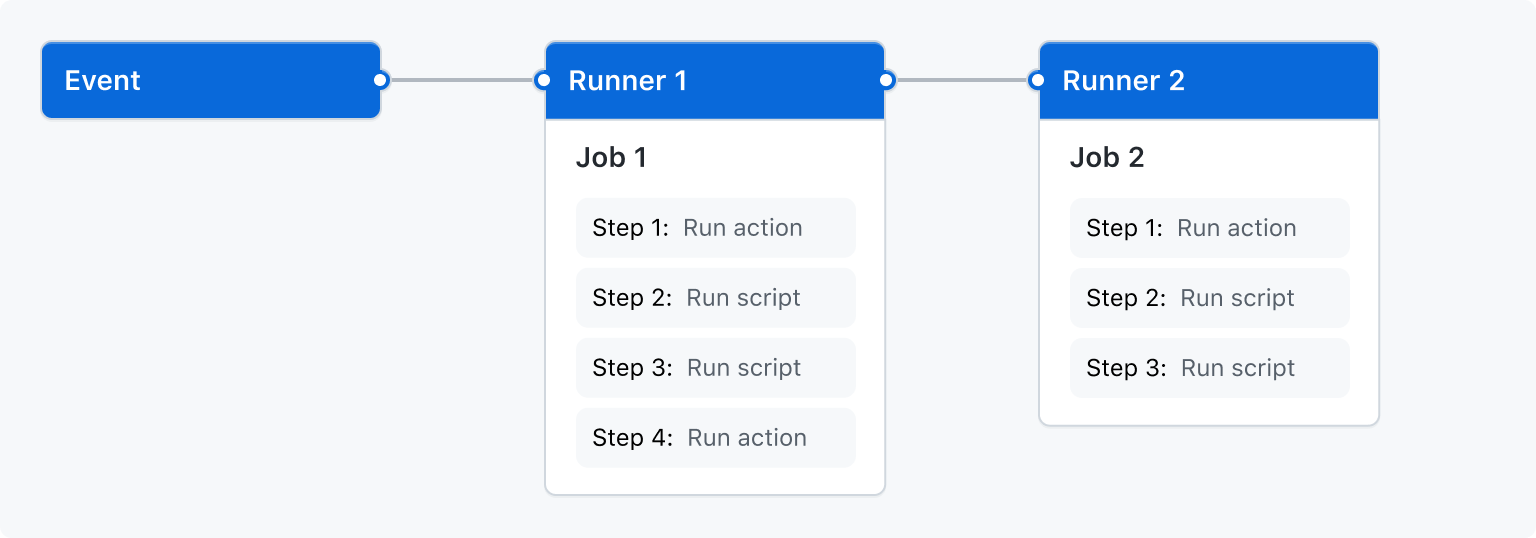


### **Workflow:**

A workflow is a configurable automated process that will run one or more jobs. Workflows are defined by a YAML file checked in to your repository and will run when triggered by an event in your repository, or they can be triggered manually, or at a defined schedule.

Workflows are defined in the `.github/workflows` directory in a repository, and a repository can have multiple workflows, each of which can perform a different set of tasks.For more information about workflows, see [Using workflows](https://docs.github.com/en/actions/using-workflows)


### **Events:**
An event is a specific activity in a repository that triggers a workflow run. You can also trigger a workflow run on a schedule, by posting to a REST API, or manually. Check out the complete [list of events](https://docs.github.com/en/actions/using-workflows/events-that-trigger-workflows) that can trigger a workflow.

### **Jobs:**
A job is a set of steps in a workflow that execute on the same runner. Each step is either a shell script that will be executed, or an action that will be run. Steps are executed in order and are dependent on each other. Since each step is executed on the same runner, you can share data from one step to another. For more information about jobs, see [Using jobs](https://docs.github.com/en/actions/using-jobs)


### **Actions:**

An action is a custom application for the GitHub Actions platform that performs a complex but frequently repeated task. Use an action to help reduce the amount of repetitive code that you write in your workflow files. For more information, see [Creating actions](https://docs.github.com/en/actions/creating-actions)

### **Runner:** 

A runner is a server that runs your workflows when they're triggered. Each runner can run a single job at a time. GitHub provides Ubuntu Linux, Microsoft Windows, and macOS runners to run your workflows; each workflow run executes in a fresh, newly-provisioned virtual machine. GitHub also offers larger runners, which are available in larger configurations.For more information, see [Using larger runners](https://docs.github.com/en/actions/using-github-hosted-runners/using-larger-runners)

## Let’s get started…
To get started, we need to create `.github/workflows` directory in our repo and inside create a new `.yml file`. A typical `.yml` file looks like this

`
name: Github Actions Demo
on:
  issues:
    types: [opened, edited, deleted] 
jobs:
  Job1:
    runs-on: ubuntu-latest     
    steps:
      - name: "This is Step 1 with bash command."
        run: echo "hello World"
        shell: bash
      - name: "This is step 2 using marketplace action."
        uses: actions/checkout@v3
  Job2:
    .....
  Job3:
    .....
`


Few things to consider:

- We need to define a `name` for the workflow and also when this workflow should run. The former can be anything you like and the latter needs to be specified using `on`.

- Here we have defined three jobs but in reality, you can have any number of jobs defined in a single `.yml` file and they will all run simultaneously when the event defined in `on` is triggered

- We have the option of defining a server using `runs-on` that will run your workflow. The stable choices include `ubuntu-latest`, `macos-latest` and `windows-latest`.

- The steps within a job are run sequentially. 

- The steps within a job can do one of two things — (a) run a bash command using `run` or (b) use a marketplace or third-party Github action using `uses`


## Hands-on example


- ### **Dump event payload**
- ### **Unit testing**
- ### **Display runs from WandB as comments under a pull request**
